# ***Imbalance Dataset Handling***
1.Up-sampling
2.Down-sampling

In [ ]:
import numpy as np
import pandas as pd


In [ ]:
np.random.seed(123)

n_samples = 1000
class_0_ratio = 0.9
n_class_0 = int(n_samples * class_0_ratio)
n_class_1 = n_samples - n_class_0

In [ ]:
n_class_0,n_class_1

(900, 100)

In [ ]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1] * n_class_1
})

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [ ]:
df['target'].value_counts()

,count
target,
0,900
1,100


### *UP-Sampling*

In [ ]:
minority = df[df['target']==1]
majority = df[df['target']==0]

In [ ]:
majority

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [ ]:
minority

,feature_1,feature_2,target
900,1.699768,2.139033,1
901,1.367739,2.025577,1
902,1.795683,1.803557,1
903,2.213696,3.312255,1
904,3.033878,3.187417,1
...,...,...,...
995,1.376371,2.845701,1
996,2.239810,0.880077,1
997,1.131760,1.640703,1
998,2.902006,0.390305,1


In [ ]:
from sklearn.utils import resample

In [ ]:
minority_upsampling = resample(minority,
                               replace=True, # sample with replecesment
                               n_samples=len(majority), # to match the majority class
                               random_state=42
                               )

In [ ]:
minority_upsampling.shape

(900, 3)

In [ ]:
df_upsampled = pd.concat([majority,minority_upsampling])

In [ ]:
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


In [ ]:
df_upsampled.shape

(1800, 3)

Down -Sampling

In [ ]:
class_0 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2' : np.random.normal(loc=0, scale=1, size=n_class_0),
    'target':[0] * n_class_0
})

class_1 = pd.DataFrame({
    'feature_1' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2' : np.random.normal(loc=2, scale=1, size=n_class_1),
    'target':[1] * n_class_1
})

In [ ]:
df = pd.concat([class_0,class_1]).reset_index(drop=True)

In [ ]:
minority = df[df['target']==1]
majority = df[df['target']==0]

In [ ]:
majority_downsampling = resample(majority,
                               replace=False, # sample without replecement
                               n_samples=len(minority), # to match the majority class
                               random_state=42
                               )

In [ ]:
majority_downsampling.shape

(100, 3)

In [ ]:
pd.concat([minority,majority_downsampling]).value_counts()

,,,count
feature_1,feature_2,target,
-1.969990,0.130563,0,1
1.866832,2.723282,1,1
1.621476,1.877267,1,1
1.628261,1.612792,1,1
1.641093,2.054318,1,1
...,...,...,...
0.473474,-0.321933,0,1
0.497556,1.095855,0,1
0.519477,1.300336,0,1


In [ ]:
df_downsampled = pd.concat([minority,majority_downsampling]).value_counts()

In [ ]:
df_downsampled

,,,count
feature_1,feature_2,target,
-1.969990,0.130563,0,1
1.866832,2.723282,1,1
1.621476,1.877267,1,1
1.628261,1.612792,1,1
1.641093,2.054318,1,1
...,...,...,...
0.473474,-0.321933,0,1
0.497556,1.095855,0,1
0.519477,1.300336,0,1


In [ ]:
df_upsampled['target'].value_counts()

,count
target,
0,900
1,900


In [ ]:
df_downsampled.value_counts()

,count
count,
1,200


# ***SMOTE (synthetic Minority Oversampling Techanique )***

In [ ]:
from sklearn.datasets import make_classification

In [ ]:
## x independent feature
## y dependent feature
x,y = make_classification(n_samples=1000,n_features=2,n_redundant=0,n_clusters_per_class=1,weights=[0.90],random_state=1)

In [ ]:
x,y

(array([[ 1.53682958, -1.39869399],
        [ 1.55110839,  1.81032905],
        [ 1.29361936,  1.01094607],
        ...,
        [-0.55662536, -0.15983725],
        [ 1.00499902,  0.93628981],
        [ 1.46210987,  1.14497791]]),
 array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
        0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 

In [ ]:
import pandas as pd
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
final_df = pd.concat([df1,df2],axis=1)


In [ ]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [ ]:
final_df['target'].value_counts()

,count
target,
0,894
1,106


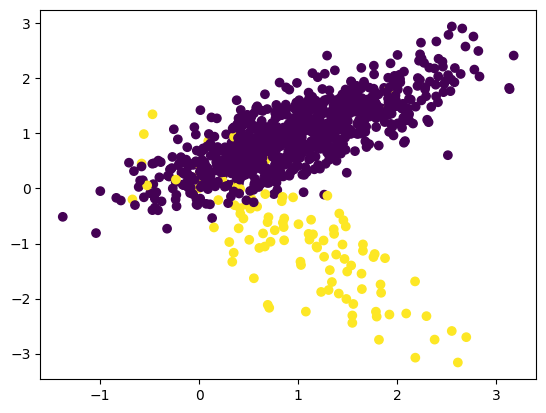

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(final_df['f1'],final_df['f2'],c=final_df['target'])

In [ ]:
pip install imblearn

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
## transform the dataset
oversample = SMOTE()
x,y = oversample.fit_resample(final_df[['f1','f2']],final_df['target'])

In [ ]:
x,y

(            f1        f2
 0     1.536830 -1.398694
 1     1.551108  1.810329
 2     1.293619  1.010946
 3     1.119889  1.632518
 4     1.042356  1.121529
 ...        ...       ...
 1783  1.812237 -2.652746
 1784  0.453477 -0.351634
 1785  0.356365 -1.181035
 1786  1.329690 -1.570506
 1787  0.702286 -0.987655
 
 [1788 rows x 2 columns],
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 1783    1
 1784    1
 1785    1
 1786    1
 1787    1
 Name: target, Length: 1788, dtype: int64)

In [ ]:
df1 = pd.DataFrame(x,columns=['f1','f2'])
df2 = pd.DataFrame(y,columns=['target'])
oversample_df = pd.concat([df1,df2],axis=1)


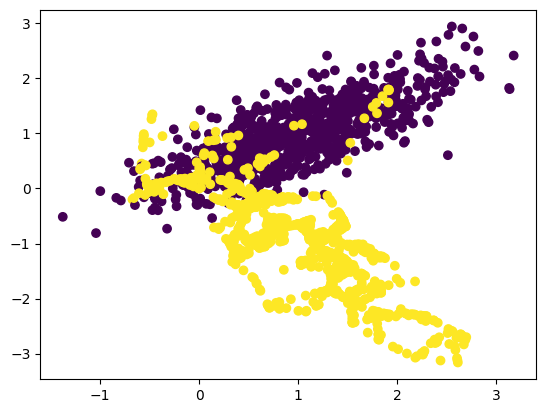

In [ ]:
plt.scatter(oversample_df['f1'],oversample_df['f2'],c = oversample_df['target'])

# ***Data Interpolation***

In [ ]:
#  Lineare Interpolation

import numpy as np
x = np.array([1,2,3,4,5,6])
y = np.array([2,3,4,5,6,7])

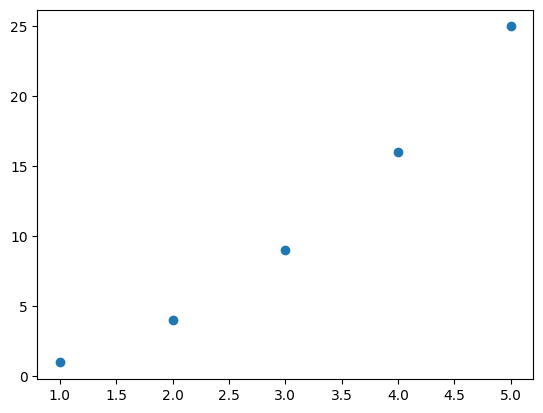

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [ ]:
# interpolation the data using linear interpolation
x_new = np.linspace(1,5,10) # create new x values
y_interp = np.interp(x_new,x,y) # interpolate y values
print(y_interp)

[2.         2.44444444 2.88888889 3.33333333 3.77777778 4.22222222
 4.66666667 5.11111111 5.55555556 6.        ]


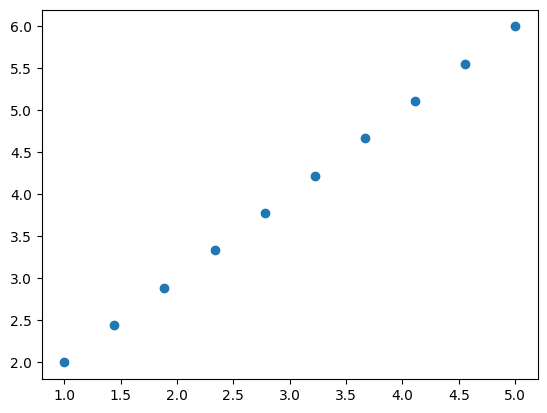

In [ ]:
plt.scatter(x_new,y_interp)

In [ ]:
# 2 . cubic interpolation with scipy
import numpy as np
x = np.array([1,2,3,4,5])
y = np.array([1,8,27,64,125])

In [ ]:
from scipy.interpolate import interp1d

In [ ]:
# create a cubic interpolation funtion
f = interp1d(x,y,kind='cubic')

In [ ]:
x_new = np.linspace(1,5,10)
y_interp = f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


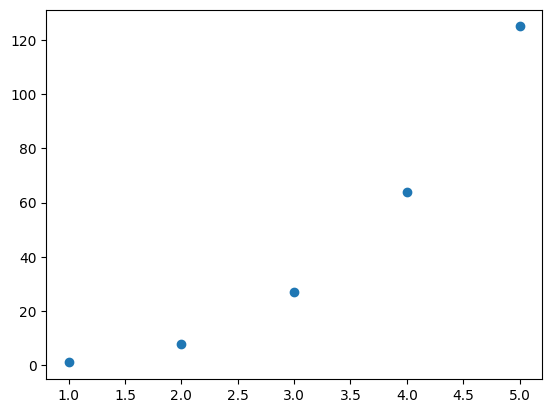

In [ ]:
plt.scatter(x,y)

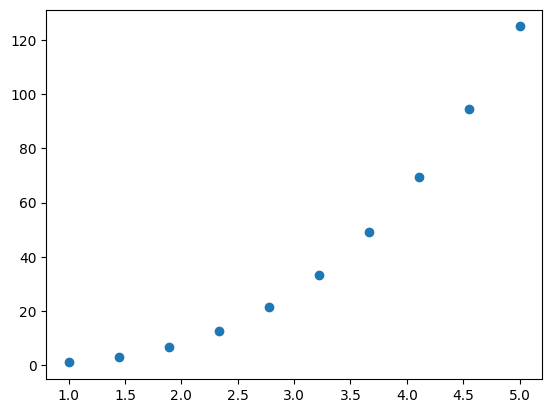

In [ ]:
plt.scatter(x_new,y_interp)

In [ ]:
# 3 polynomial interpolation

x = np.array([1,2,3,4,5])
y = np.array([1,4,9,16,25])

In [ ]:
# interpolate the data using polynomial interpolations
p = np.polyfit(x,y,2) # fit a 2nd degree polynomial to the data (kitana bend karana hai thats is degree)

In [ ]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)

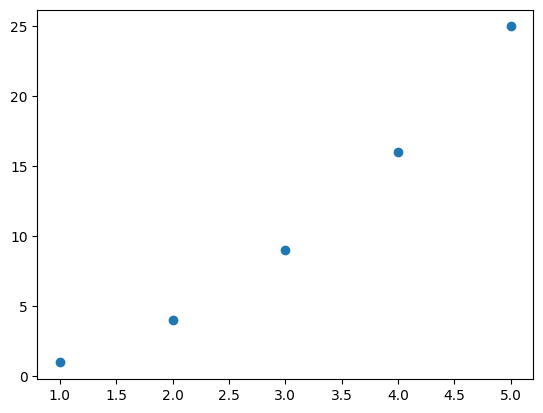

In [ ]:
plt.scatter(x,y)

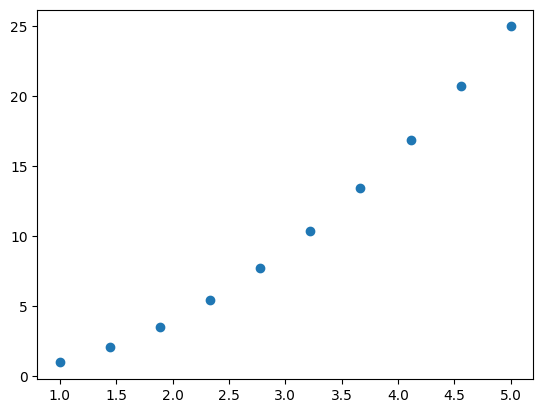

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x_new,y_interp)

In [ ]:
p = np.polyfit(x,y,2)

In [ ]:
x_new = np.linspace(1,5,10)
y_interp = np.polyval(p,x_new)

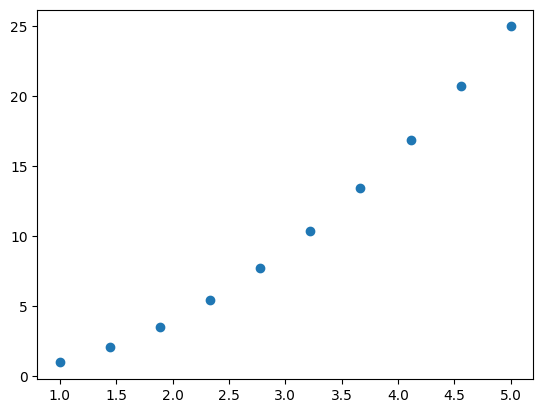

In [ ]:
plt.scatter(x_new,y_interp)

# ***Handling Outliers***

In [ ]:
### 5 number summary
# 1. Minimum value
# 2. Q1-25 percentile
# 3. Median
# 4. Q3 - 75 percentile
# 5. Maximum

In [ ]:
import numpy as np
marks = [32,44,53,54,35,78,43,88,33,75,75,85,37,92,1000,1222]

In [ ]:
## [Lower_fence <-----> Higher_fence]
Q1 = np.percentile(marks,[25])
Q2 = np.percentile(marks,[75])

In [ ]:
minimum,Q1,Q2,Q3,maximum = np.quantile(marks,[0,0.25,0.50,0.75,1.0])

In [ ]:
minimum,Q1,Q2,Q3,maximum

(32.0, 41.5, 64.5, 85.75, 1222.0)

In [ ]:
IQR = Q3-Q1 # inter quertial range
print(IQR)

44.25


In [ ]:
lower_fence = Q1-1.5*(IQR)
Heigher_fence = Q3+1.5*(IQR)

In [ ]:
lower_fence,Heigher_fence

(-24.875, 152.125)

In [ ]:
outliers=[]

for i in marks:
  if i>=24.875 and i<=152.125:
    print('the element is not outlier')
  else:
    outliers.append(i)

the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier
the element is not outlier


In [ ]:
outliers

[1000, 1222]

<Axes: >

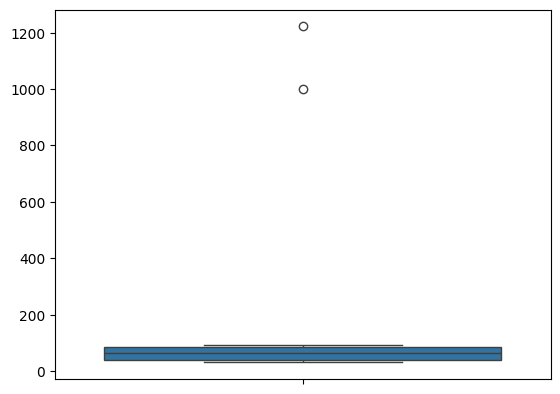

In [ ]:
import seaborn as sns
sns.boxplot(marks)

<Axes: >

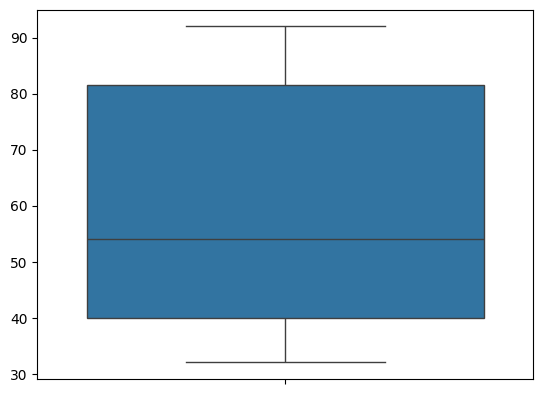

In [ ]:
marks = [32,44,53,54,35,78,43,88,33,75,75,85,37,92,88]
sns.boxplot(marks)

# ***Feature Scalling Normalazation***
### 1.Standardazation

In [ ]:
import seaborn as sns
df = sns.load_dataset('tips')

<Axes: ylabel='Count'>

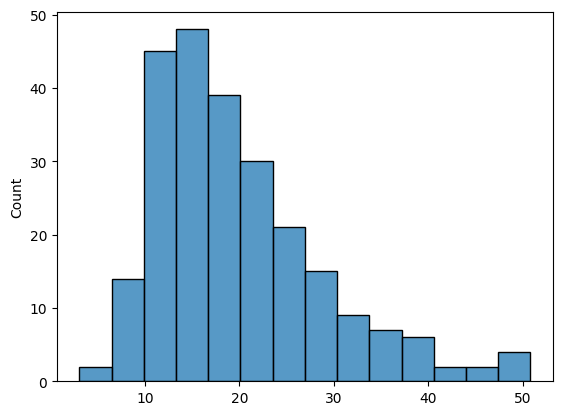

In [ ]:
sns.histplot(total_bill)

In [ ]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
total_bill = list(df['total_bill'])

In [ ]:
import numpy as np
mean =np.mean(total_bill)
std = np.std(total_bill)

In [ ]:
mean,std

(19.78594262295082, 8.884150577771132)

In [ ]:
normalized_data=[]
for i in total_bill:
  z_score = (i-mean)/std
  normalized_data.append(z_score)

print(normalized_data)

[-0.3147113050904943, -1.0632353132988692, 0.13777989987156145, 0.43831510316725475, 0.540744704290506, 0.6195367051545455, -1.2399545152367863, 0.7985071071171495, -0.5342033074974614, -0.5634689078183903, -1.0711145133852733, 1.7417599174609364, -0.49143050702841123, -0.15262490331304146, -0.557840907756673, 0.2019391005751361, -1.0643609133112126, -0.3935033059545337, -0.31696250511518104, 0.09725829942719795, -0.2100305039425557, 0.05673669898283484, -0.45203450659639155, 2.2100095225958003, 0.003833498402694168, -0.2224121040783337, -0.7221785095588127, -0.7987193103981653, 0.21544630072325727, -0.015301701807144186, -1.1521577142739994, -0.16162970341178864, -0.5319521074727743, 0.10176069947657193, -0.22578890411536368, 0.4810879036363046, -0.3912521059298469, -0.32146490516455467, -0.12335930299211233, 1.2926455125359115, -0.4216433062631192, -0.2618081045103532, -0.6580193088552376, -1.137524914113535, 1.1947183114620337, -0.16838330348584943, 0.2751031013774587, 1.41983831393

<Axes: ylabel='Count'>

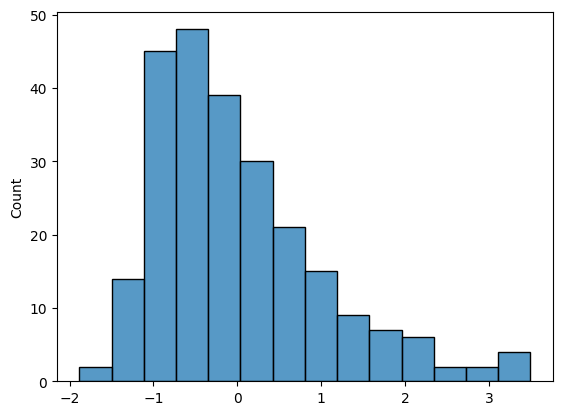

In [ ]:
sns.histplot(normalized_data)

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(df[['total_bill','tip']])

StandardScaler()

In [ ]:
import pandas as pd

pd.DataFrame(scaler.transform(df[['total_bill','tip']]),columns=['total_bill','tips'])

,total_bill,tips
0,-0.314711,-1.439947
1,-1.063235,-0.969205
2,0.137780,0.363356
3,0.438315,0.225754
4,0.540745,0.443020
...,...,...
239,1.040511,2.115963
240,0.832275,-0.722971
241,0.324630,-0.722971
242,-0.221287,-0.904026


### ***2. Normalization ( Min-Max Scaler)***

*   data --> 0 to 1 In range




In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('taxis')

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
min_max = MinMaxScaler() # use Model

In [ ]:
min_max.fit(df[['distance','fare','tip']])  # fit model to given datas

MinMaxScaler()

In [ ]:
min_max.transform(df[['distance','fare','tip']]) # transform into normalization ( min-max scaler)

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [ ]:
min_max.fit_transform(df[['distance','fare','tip']])  #

array([[0.04359673, 0.04026846, 0.06475904],
       [0.02152589, 0.02684564, 0.        ],
       [0.0373297 , 0.04362416, 0.07108434],
       ...,
       [0.11280654, 0.10067114, 0.        ],
       [0.03051771, 0.03355705, 0.        ],
       [0.10490463, 0.09395973, 0.10120482]])

In [ ]:
min_max.transform([[1,3,4]]) # new datapoint transform

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


array([[0.02724796, 0.01342282, 0.12048193]])

### Unit ***Vector***

*   Magnitude of 1



In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('iris')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
from sklearn.preprocessing import normalize

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392],
       [0.790965  , 0.5694948 , 0.2214702 , 0.0316386 ],
       [0.78417499, 0.5663486 , 0.2468699 , 0.05808704],
       [0.78010936, 0.57660257, 0.23742459, 0.0508767 ],
       [0.80218492, 0.54548574, 0.24065548, 0.0320874 ],
       [0.80642366, 0.5315065 , 0.25658935, 0.03665562],
       [0.81803119, 0.51752994, 0.25041771, 0.01669451],
       [0.80373519, 0.55070744, 0.22325977, 0.02976797],
       [0.786991  , 0.55745196, 0.26233033, 0.03279129],
       [0.82307218, 0.51442011, 0.24006272, 0.01714734],
       [0.8025126 , 0.55989251, 0.20529392, 0.01866308],
       [0.81120865, 0.55945424, 0.16783627, 0.02797271],
       [0.77381111, 0.59732787, 0.2036345 , 0.05430253],
       [0.79428944, 0.57365349, 0.19121783, 0.05883625],
       [0.80327412, 0.55126656,

In [ ]:
import pandas as pd
pd.DataFrame(normalize(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]),columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])

,sepal_length,sepal_width,petal_length,petal_width
0,0.803773,0.551609,0.220644,0.031521
1,0.828133,0.507020,0.236609,0.033801
2,0.805333,0.548312,0.222752,0.034269
3,0.800030,0.539151,0.260879,0.034784
4,0.790965,0.569495,0.221470,0.031639
...,...,...,...,...
145,0.721557,0.323085,0.560015,0.247699
146,0.729654,0.289545,0.579090,0.220054
147,0.716539,0.330710,0.573231,0.220474
148,0.674671,0.369981,0.587616,0.250281


# ***Covarience AND Correlation***

In [ ]:
import seaborn as sns

In [ ]:
df = sns.load_dataset('healthexp')
df.head()

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


In [ ]:
df([df.cov()])

ValueError: could not convert string to float: 'Germany'

In [ ]:
np.cov()